'''
Use PCA to evaluate the axes of variation.
'''

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib as mpl

In [3]:
colorset = ['#763C87','#1FA2F4','#0569CE','#F48C36','#E54028']
greens = ['#37535e', '#3b748a', '#4095b5', '#52aec9', '#72bfc4', '#93d0bf']

mpl.rcParams.update({
'backend': 'MacOSX',
'text.usetex': 'false',
'font.family': 'Myriad Pro',
'font.size': 18, 
'figure.subplot.hspace': .4,
'figure.subplot.bottom': 0.125, 
'savefig.dpi': 600,
'savefig.format': 'pdf', 
'pdf.fonttype': 42,
'figure.edgecolor': (1, 1, 1, 0), 
'figure.facecolor': (1, 1, 1, 0), 
'figure.figsize': (15.0, 10.0),
'font.weight': 'bold',
'axes.labelweight': 'bold',
'axes.titlesize': 36,
'lines.markersize': 11.200000000000001,
 'ytick.major.width': 1.6,
 'xtick.major.width': 1.6,
 'lines.markeredgewidth': 0.0,
 'xtick.major.pad': 11.200000000000001,
 'ytick.minor.width': 0.8,
 'grid.linewidth': 1.6,
 'lines.linewidth': 2.8000000000000003,
 'ytick.major.pad': 11.200000000000001,
})

In [4]:
filename = '../data/mean/rpkm.txt'
data = pd.io.parsers.read_csv(filename, 
                                    sep='\t', 
                                    header=0, index_col=0)

print(data.shape)
cols = ['No-Peptide-24h',
        '10uM-K99A-24h', 
        '100uM-K99A-24h', 
        '0-1uM-PCC-24h', 
        '10uM-PCC-24h', 
        ]
labels = ['No Peptide', '10uM K99A', '100uM K99A', '0.1uM PCC', '10uM PCC']
subdata = data[cols]
subdata.head()

(20474, 32)


,No-Peptide-24h,10uM-K99A-24h,100uM-K99A-24h,0-1uM-PCC-24h,10uM-PCC-24h
id,,,,,
NM_013478,0.0000,0.0000,0.0000,0.0000,0.0000
NM_172784,0.3145,0.8530,1.3405,1.0895,0.9210
NM_007732,0.0415,0.0040,0.0095,0.0090,0.0105
NM_016772,42.7335,36.6585,29.7200,25.7330,28.8205
NM_172858,0.0000,0.0000,0.0000,0.0000,0.0040


In [5]:
# Filter out genes that aren't changing.
def check_changing(row):
    if row.max() - row.min() < row.min():
        return False
    if row.max() < 10:
        return False
    return True
filtered = subdata[subdata.apply(check_changing, axis=1)]
print(filtered.shape)
filtered.head()

(3048, 5)


,No-Peptide-24h,10uM-K99A-24h,100uM-K99A-24h,0-1uM-PCC-24h,10uM-PCC-24h
id,,,,,
NM_138659,48.4485,77.3010,106.1970,112.5910,116.6430
NM_023733,13.6500,11.0090,6.4600,6.5515,5.6485
NM_010824,59.6695,37.8300,16.1620,7.8325,2.1120
NM_172938,23.1535,11.6360,2.7515,3.6125,1.1045
NM_026389,10.9910,15.4875,24.8235,27.4805,30.8115


In [6]:
n = 5
transpose = filtered.transpose()
pca = PCA(n_components=n)
X_r = pca.fit(transpose).transform(transpose)
print('Explained variance ratio (first {} components): '.format(n)
      + str(pca.explained_variance_ratio_))
X_r

Explained variance ratio (first 5 components): [  9.94830139e-01   3.96352491e-03   8.59291247e-04   3.47044688e-04
   6.28055399e-30]


/Applications/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


array([[ -1.23721677e+04,   4.77252536e+02,  -5.81981676e+01,
          8.27710721e+00,  -3.76891296e-11],
       [ -4.03626252e+03,  -7.40392956e+02,   2.26695401e+02,
          1.84686929e+01,   1.47500900e-11],
       [  3.67463865e+03,  -2.93192451e+02,  -3.71801448e+02,
          8.19210509e+01,   7.82987564e-12],
       [  4.95137685e+03,   1.18687475e+02,   7.41674645e+00,
         -2.54892558e+02,   1.21004040e-11],
       [  7.78241477e+03,   4.37645396e+02,   1.95887468e+02,
          1.46225707e+02,   3.04684056e-12]])

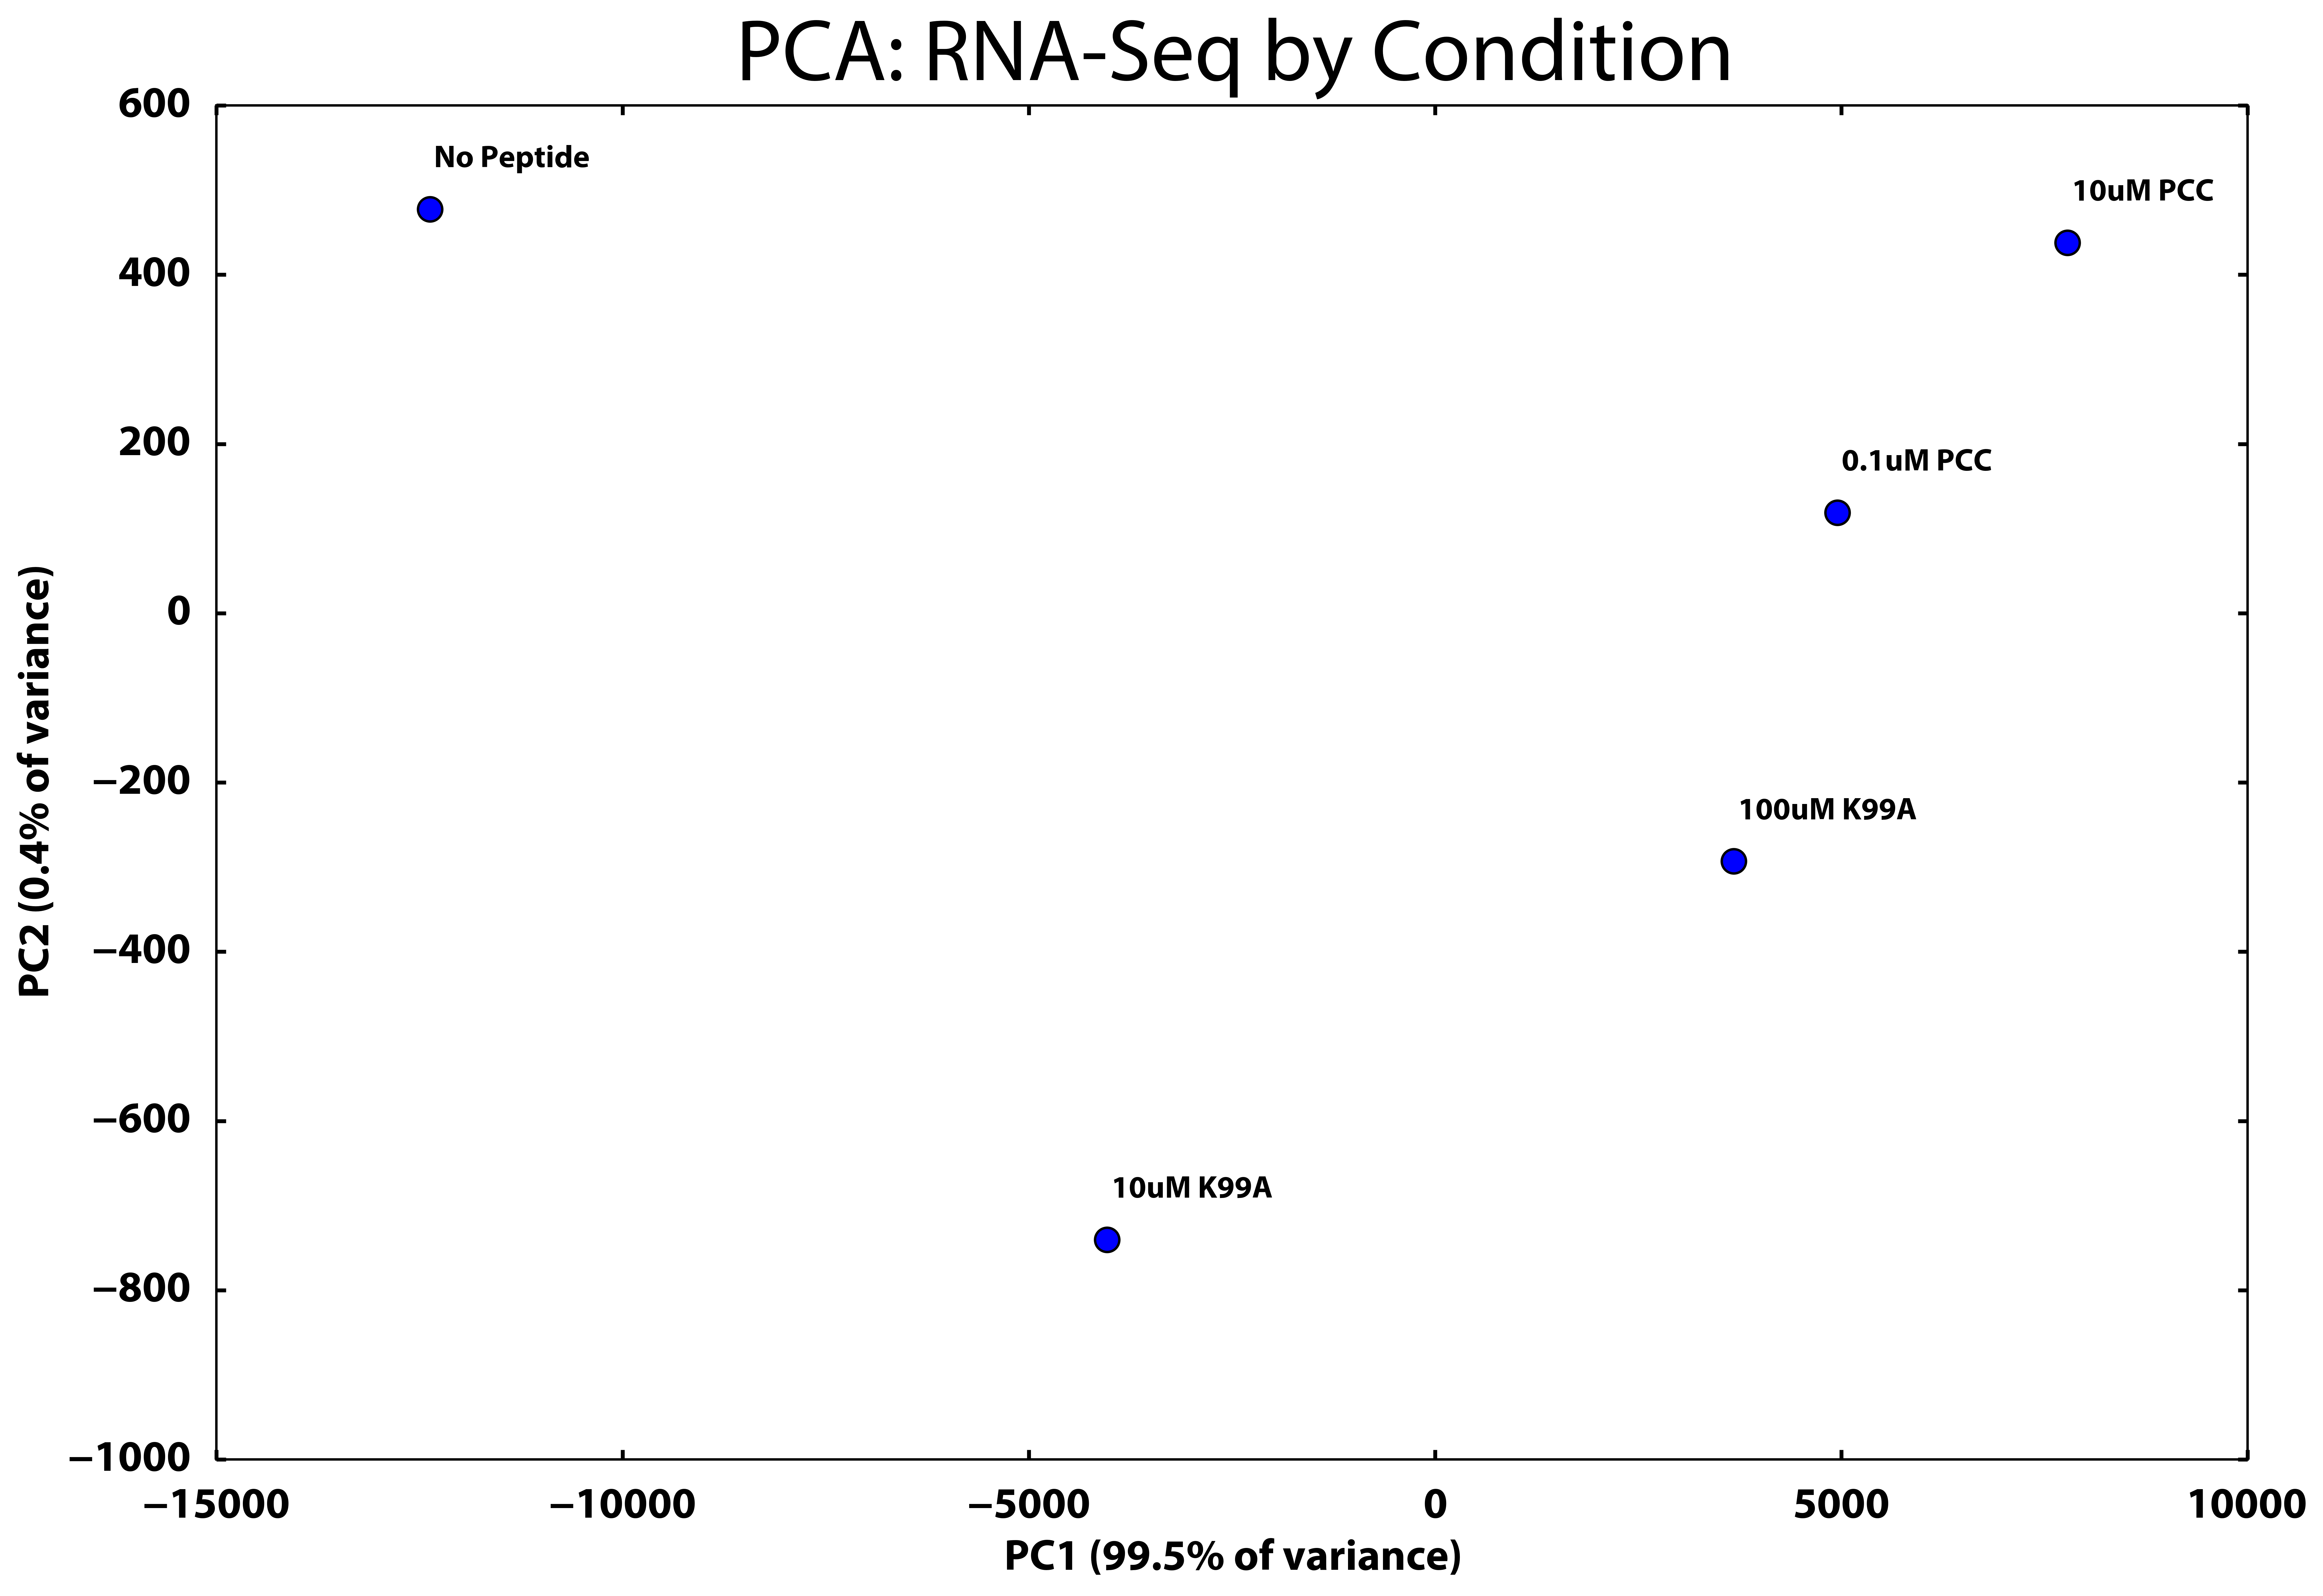

In [7]:
plt.figure(figsize=[15, 10])
plt.scatter(X_r[:, 0].tolist(), X_r[:, 1].tolist(), s=100)
plt.title('PCA: RNA-Seq by Condition', y=1.01)
plt.xlabel('PC1 (99.5% of variance)')
plt.ylabel('PC2 (0.4% of variance)')

margin = 50
for i, txt in enumerate(labels):
    if i % 2: dir = -1
    plt.annotate(txt, (X_r[i,0] + margin,X_r[i,1] + margin),
                 size=13)

plt.savefig('figures/PCA_RNA-Seq_by_Condition',
            bbox_inches='tight')

In [8]:
# We want to get the top and bottom features that make up each component.
out_data = data[:]
out_data['gene_name'] = [s.split('|')[0] for s in data['Annotation/Divergence']]

components = pd.DataFrame(pca.components_)
pcs = []

for x in range(0,2):
    pc = components.loc[x]
    pc.sort()
    ten_pct = len(pc)/10
    bottom = pc.index[:int(round(ten_pct))]
    top = pc.index[int(round(9*ten_pct)):]
    
    bottom_ids = filtered.index[bottom]
    top_ids = filtered.index[top]
    out_data.loc[bottom_ids].to_csv('output/clusters/pca_pc{}_bottom_rna_and.txt'.format(x + 1), 
                        sep='\t', header=True, index=True)
    out_data.loc[top_ids].to_csv('output/clusters/pca_pc{}_top_rna_and.txt'.format(x + 1), 
                        sep='\t', header=True, index=True)
    pcs.append([filtered.loc[bottom_ids], filtered.loc[top_ids]])

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
# Output all, sorted, with the PC index.
pc_data = out_data.loc[filtered.index]
pc_data['pc1'] = components.loc[0].tolist()
pc_data['pc2'] = components.loc[1].tolist()
pc_data.to_csv('output/clusters/pca_genes_rna_and.txt', 
                        sep='\t', header=True, index=True)

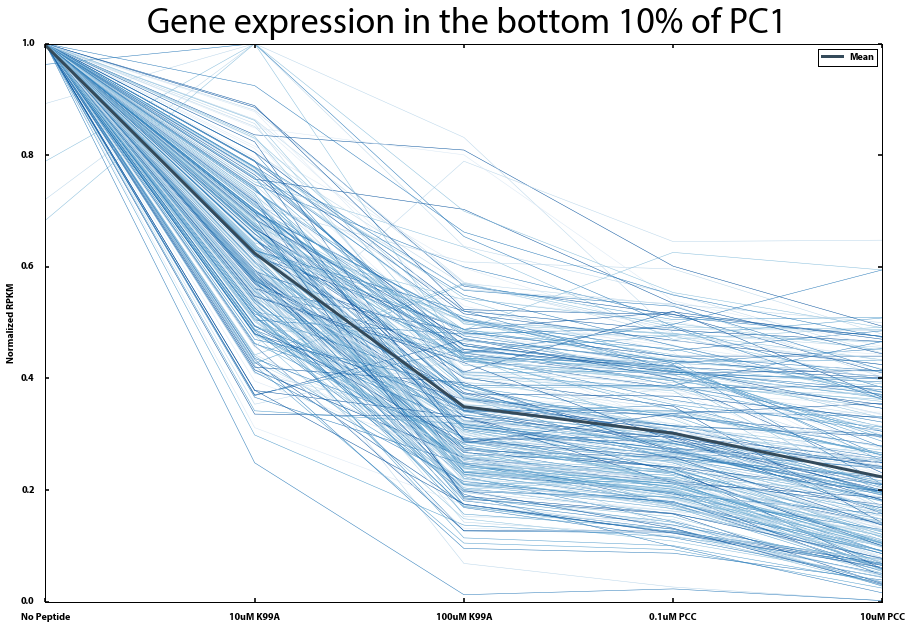

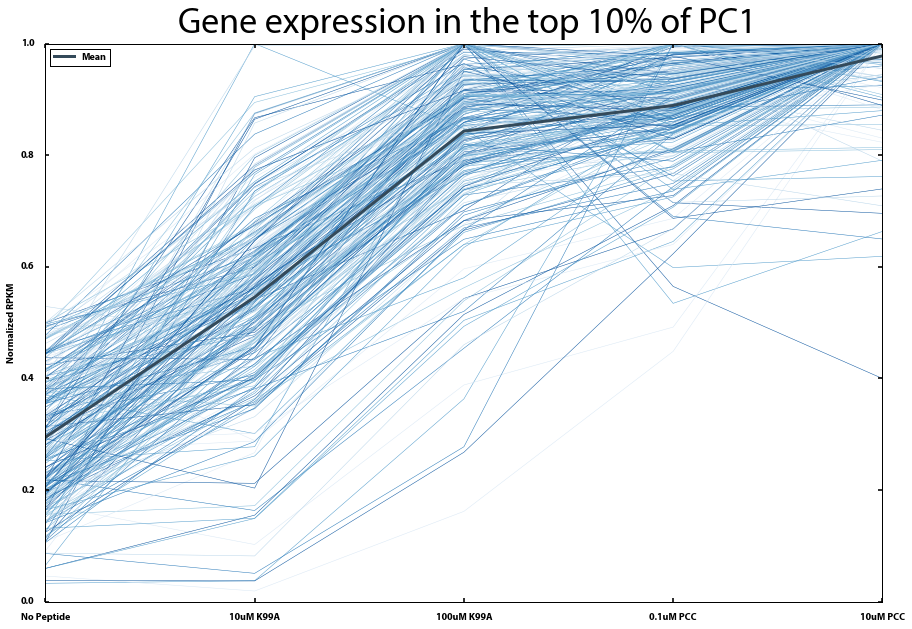

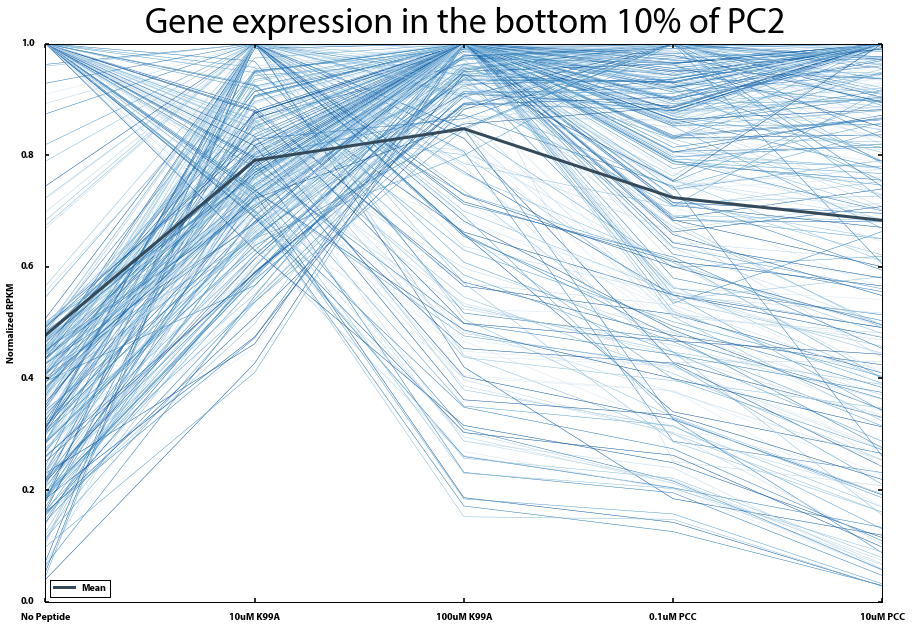

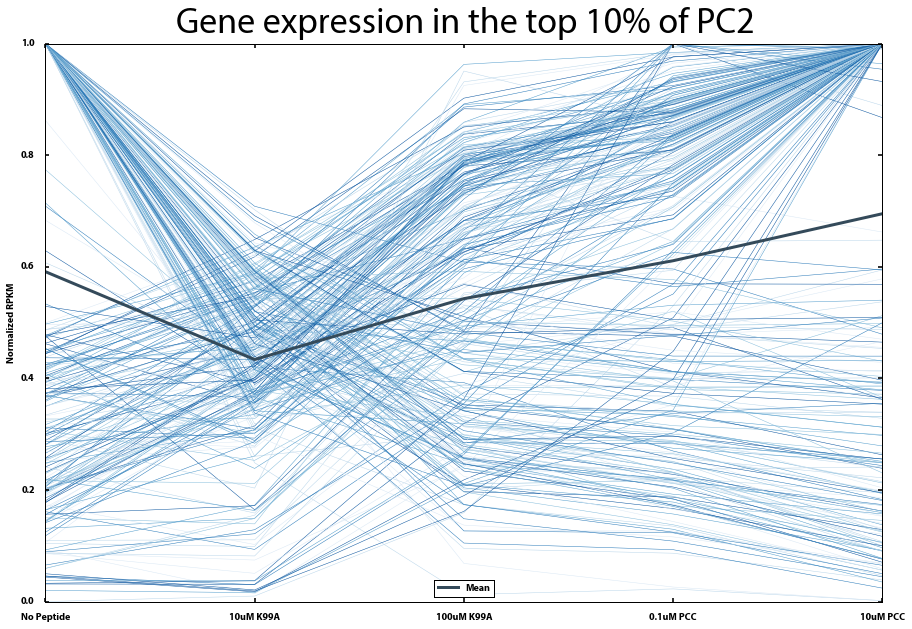

In [15]:
for i, pc in enumerate(pcs):
    for j, segment in enumerate(pc):
        label = 'bottom'
        if j%2: label = 'top'
        normed = segment.divide(segment.max(axis=1), axis=0)
        fig = plt.figure(figsize=[15, 10])
        ax = fig.add_subplot(1,1,1)
    
        blues = ['#dae8f5', '#bad6ea', '#88bedc', '#539dcc', '#2a7ab9', '#0b559f']
        normed.T.plot(legend=False, linewidth=.5, 
                      ax=ax, color=blues)
        
        normed.mean().plot(legend=True, linewidth=3, 
                        ax=ax, color='#344a5a',
                        label='Mean')
        ax.grid(False)
        plt.xticks(range(0, len(labels)), labels)
        plt.ylabel('Normalized RPKM')
        title = 'Gene expression in the {} 10% of PC{}'.format(label, i+1)
        plt.title(title, y=1.01)
        plt.savefig('figures/' + title.replace(' ', '_'),
            bbox_inches='tight')

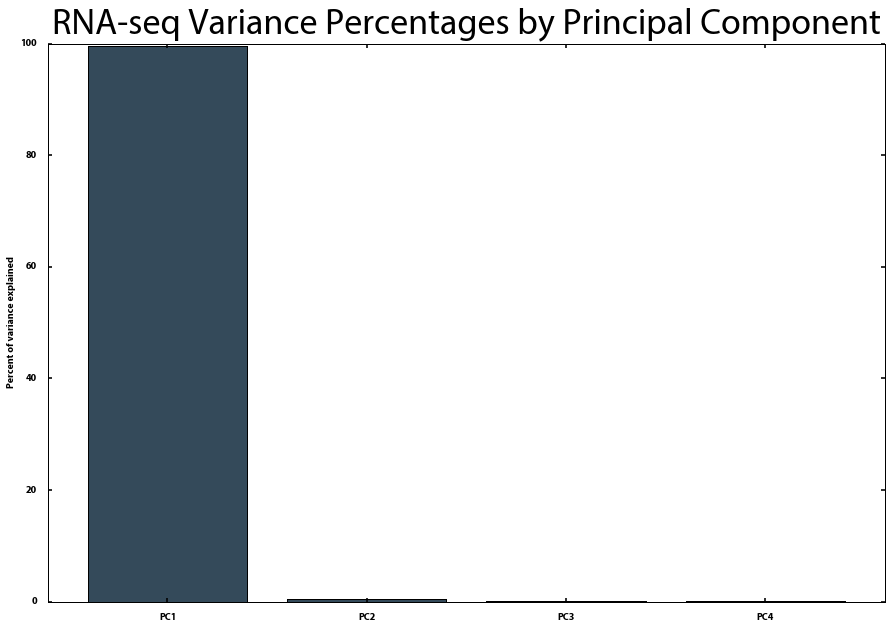

In [16]:
# Plot percent variance explained by the first four PCs
num = 4
span = range(0,num)
ratios = pca.explained_variance_ratio_[:num]*100
plt.figure(figsize=[15, 10])

plt.bar([x + .2 for x in span], ratios, color='#344a5a')
plt.xlim([0, num + .2])
plt.ylabel('Percent of variance explained')
plt.xticks([x + .6 for x in span], ['PC{}'.format(x + 1) for x in span])
title = 'RNA-seq Variance Percentages by Principal Component'
plt.title(title, y=1.01)
plt.savefig('figures/{}'.format(title.replace(' ', '_')), bbox_inches='tight')

In [11]:
len(bottom)

305